# Simulations of the compartmental system as depicted in the internship report
## Using the perinuclear crown as a biomarker 

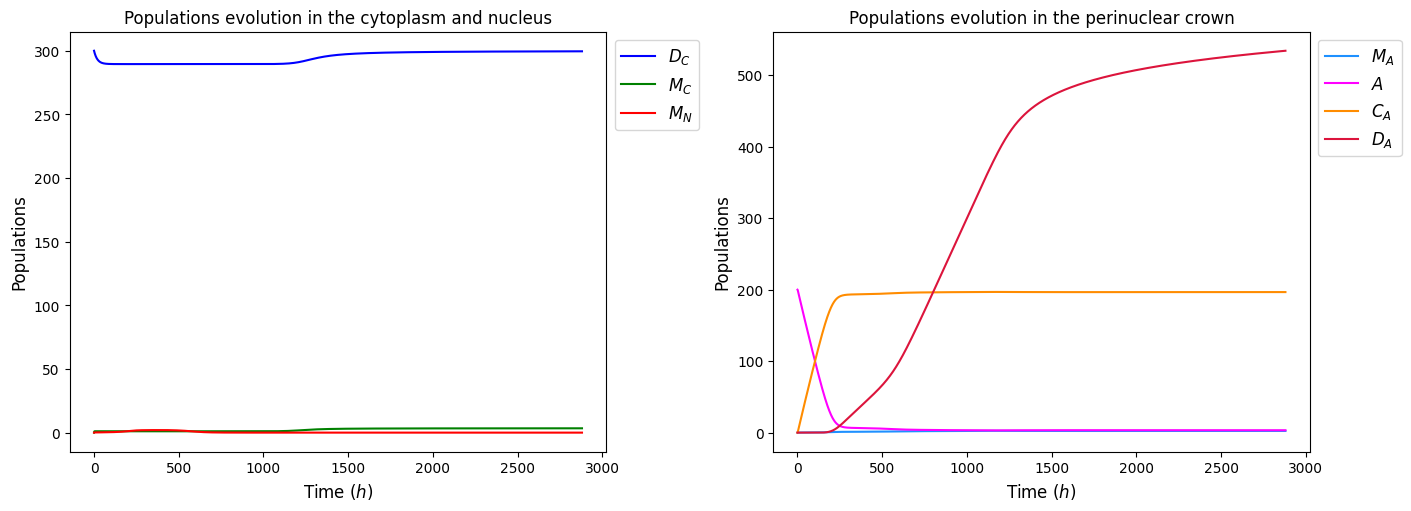

In [2]:
from compartmental.Simulation import Simulation

four_monthes_duration = 24 * 30 * 4  # in hours
time_step = 1 / 60  # in hours

a_sim = Simulation(four_monthes_duration, time_step)

dimers_production = lamdA = 15
dimers_degradation = d0 = 0.05
monomers_degradation_in_nucleus = d1 = 0.3
coefs_dimer_formation_cytoplasm = a1, e1 = 0.1, 20
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2 = 400, 0.4, 15, 20
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3 = 80, 0.5, 5, 0.5, 1
coefs_complex_formation = a4, e4 = 0.05, 20
coefs_dimer_formation_crown = a5, b5, n5, e5 = 0.4, 150, 15, 20
e6 = 0.5
coefs_fragmentation = cs, e0 = 0.002, 20

initial_compartments_no_crown = (300, 0, 0, 0, 200, 0, 0)

a_sim.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                    initial_compartments_no_crown)

times_antioxidant = ()
dose_antioxidant = 0.15
times_irradiation = ()
dose_irradiation = 15
times_statin = ()
dose_statin = 5

a_sim.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                    times_statin, dose_statin)

a_sim.simulate()

a_sim.plot_all_compartments()

## Investigating therapeutics strategies to destroy the perinuclear crown

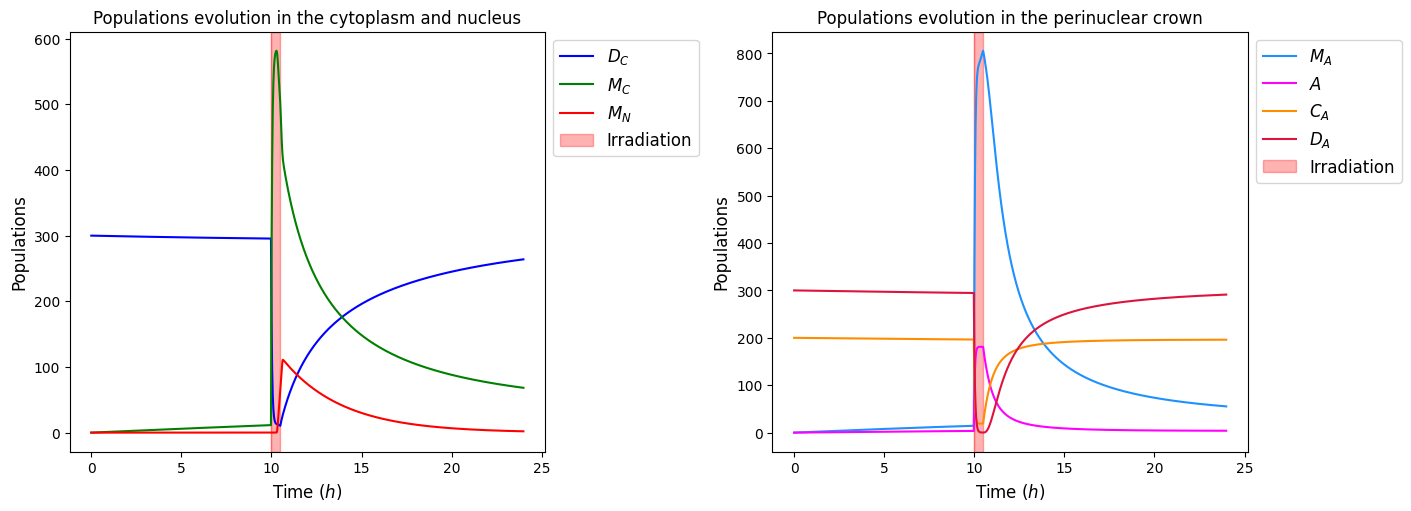

In [3]:
a_day_duration = 24

a_sim = Simulation(a_day_duration, time_step)

coefs_dimer_formation_cytoplasm = a1, e1 = 0.001, 20
coefs_migration_cytoplasm_to_crown = a2, b2, n2, e2 = 1, 0.4, 3, 20
coefs_migration_crown_to_nucleus = a3, b3, n3, e3, f3 = 1, 0.5, 5, 0.5, 1
coefs_complex_formation = a4, e4 = 0.002, 20
coefs_dimer_formation_crown = a5, b5, n5, e5 = 0.002, 150, 3, 20
e6 = 0.5
coefs_fragmentation = cs, e0 = 0.002, 20

initial_compartments_crown_formed = (300, 0, 0, 0, 0, 200, 300)

a_sim.setup_compartmental_system(d0, d1, lamdA, coefs_dimer_formation_cytoplasm, coefs_migration_cytoplasm_to_crown,
                                    coefs_migration_crown_to_nucleus, coefs_complex_formation,
                                    coefs_dimer_formation_crown, e6, coefs_fragmentation,
                                    initial_compartments_crown_formed)

times_irradiation = (10, 10.5)

a_sim.setup_experimental_conditions(times_antioxidant, dose_antioxidant, times_irradiation, dose_irradiation,
                                    times_statin, dose_statin)

a_sim.simulate()

a_sim.plot_all_compartments()